# matplotlib 노트

참고자료: 

공학자를 위한 Python (https://wikidocs.net/14570)

matplotlib 트위키 (https://matplotlib.org/)

## matplotlib 와 pyplot 모듈
matplotlib는 여러 종류의 그래프를 그리는데 쓸 수 있는 파이썬 라이브러리이다. pyplot 모듈안에 있는 함수를 이용하여 matplotlib를 사용할 수 있다. 또 많은 경우 numpy 모듈도 같이 사용하는 경우가 많기 때문에 아래와 같이 두 줄을 써주는 것은 matplotlib를 이용할 때 전형적이다. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np

## matplotlib을 사용하는데 도움이 되는 기본적인 개념들

matplotlib를 이용하여 만든 그래프의 각 부분의 명칭을 표시한 예시 그림


![](./anatomy.png)
![](./4-5.png)
![](./hierachy_artist.png)

구조, matplotlib 특징, 코딩 스타일

state-machine enviroment

위의 그림을 보면 알 수 있듯이 matplotlib로 그린 그래프는 계층구조로 이루어져 있다. 가장 상위의 계층에 Figure가 있고 그 아래 계층은 Axes이다. 이러한 계층을 알고 있으면 실제 코드를 좀 더 쉽게 이해할 수 있다. 사실 matplotlib 자체가 사용자와 가장 가까운 (인터페이스 또는 pyplot) Scripting layer, 사용자와 가장 말단 계층 사이에 위치하여 그 둘을 연결하고 있는 여러 객체가 있는 Artist layer, 마지막으로 가장 말단의 Backend layer 를 갖고 있는 계층구조로 이루어져 있다. 위의 그림에서 볼 수 있는 계층구조는 이러한 전체 계층구조에서 볼 때 Artist layer에 해당한다. 코드를 통해 그래프를 그리는 것이 목적인 사용자 입장에서는 Artist layer 정도 까지만 이해해도 matplotlib를 사용하는데 무리가 없을 것이다.

아래 두 코드는 이러한 구조를 갖는 matplotlib를 이용하는 두 가지 코딩 스타일을 보여준다 

# Figure와 Axes를 명시적으로 만드는 스타일 

아래 두가지 스타일은 모두 유효하고 각각 장단점을 갖고 있다. 주의할 것은 이 두 가지 스타일을 섞어 쓰지 않는 것이 좋다.

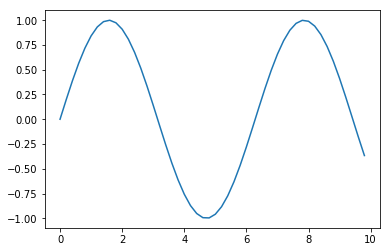

In [16]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots() # Figure와 Axes를 subplots()를 이용해서 명시적으로 만들었다
ax.plot(x, y)            # 표현하고자 하는 데이터 x, y를 인자로 넘겨주면 Line2D라는 객체를 "현재" Axes에 연결한다.
plt.show()               # jupyter-note를 사용하는 경우 불필요

In [17]:
del fig, ax # 생성된 Figure와 Axes를 삭제한다

# Figure와 Axes를 암묵적으로 만드는 스타일

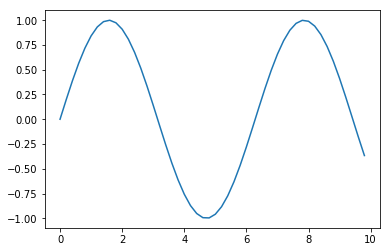

In [18]:
plt.plot(x, y)           # Figure와 axes가 없을 경우 자동으로 생성한 후, Line2D라는 객체를 "현재" Axes에 연결.
plt.show()               # jupyter-note를 사용하는 경우 불필요

pyplot은 항상 "현재" Axes(또는 Figure)에 변경 사항이 함수를 통해 적용된다. Axes나 Figure를 생성하면 그 생성된 Axes가 현재 axes가 되고 변경 사항은 현재 Axes에만 적용된다. 명시적인 방법으로 Axes를 만들면 원하는 axes에 원하는 변경 사항을 쉽게 적용 할 수 있다. 이 코딩 스타일은 코드가 복잡해 질 경우 코드 가독성이 좋다는 데에 있다. 이제부터 나오는 코드들은 명시적으로 Figure와 Axes를 만드는 코드 스타일을 이용하겠다.

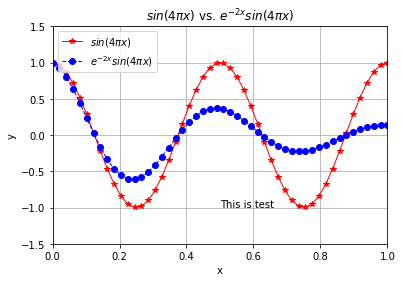

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,50)

y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

fig, axes = plt.subplots()

axes.plot(x,y1,'r-*', label=r'$sin(4 \pi x)$',lw=1)
axes.plot(x,y2,'b--o',label=r'$ e^{-2x} sin(4\pi x) $',lw=1)
axes.set_title(r'$sin(4 \pi x)$ vs. $ e^{-2x} sin(4\pi x)$')
axes.set_xlabel('x')
axes.set_ylabel('y')

axes.text(0.5, -1.0, "This is test")
axes.axis([0,1,-1.5,1.5])
axes.grid(True)
axes.legend(loc='upper left')
#axes.tight_layout()
